In [1]:
import os
os.chdir("../../")

In [2]:
import surgeon
import scanpy as sc
import seaborn
import numpy as np
from scipy.stats import linregress

Using TensorFlow backend.
/home/mohsen/miniconda3/envs/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/mohsen/miniconda3/envs/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/mohsen/miniconda3/envs/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/mohsen/miniconda3

In [6]:
cell_type = "NK"
target_condition = "stimulated"
source_condition = "control"
target_dataset = "Kang"

In [19]:
reconstructed_adata = sc.read("./results/perturbation/reconstructed-1-mse.h5ad")
reconstructed_adata

AnnData object with n_obs × n_vars = 298 × 1966 
    obs: 'batch', 'cell_type', 'condition', 'integrated_snn_res.0.5', 'nCount_RNA', 'nFeature_RNA', 'n_counts', 'orig.ident', 'seurat_annotations', 'seurat_clusters', 'size_factors', 'stim', 'study'

In [20]:
adata = sc.read("./data/pbmc_perturb/pbmc_perturb_normalized.h5ad")
adata

AnnData object with n_obs × n_vars = 21742 × 1966 
    obs: 'batch', 'cell_type', 'condition', 'integrated_snn_res.0.5', 'nCount_RNA', 'nFeature_RNA', 'n_counts', 'orig.ident', 'seurat_annotations', 'seurat_clusters', 'size_factors', 'stim', 'study'
    var: 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0'

In [21]:
kang = adata[adata.obs['study'] == 'Kang']
kang

View of AnnData object with n_obs × n_vars = 13576 × 1966 
    obs: 'batch', 'cell_type', 'condition', 'integrated_snn_res.0.5', 'nCount_RNA', 'nFeature_RNA', 'n_counts', 'orig.ident', 'seurat_annotations', 'seurat_clusters', 'size_factors', 'stim', 'study'
    var: 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0'

In [22]:
cell_type_adata = kang[kang.obs['cell_type'] == 'NK']
cell_type_adata

View of AnnData object with n_obs × n_vars = 619 × 1966 
    obs: 'batch', 'cell_type', 'condition', 'integrated_snn_res.0.5', 'nCount_RNA', 'nFeature_RNA', 'n_counts', 'orig.ident', 'seurat_annotations', 'seurat_clusters', 'size_factors', 'stim', 'study'
    var: 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0'

In [23]:
target_adata = cell_type_adata[cell_type_adata.obs['condition'] == target_condition]
source_adata = cell_type_adata[cell_type_adata.obs['condition'] == source_condition]

In [24]:
pred_adata = reconstructed_adata

In [25]:
x_mean = np.mean(pred_adata.X, axis=0)
y_mean = np.mean(target_adata.X, axis=0)
z_mean = np.mean(source_adata.X, axis=0)

In [26]:
x_var = np.var(pred_adata.X, axis=0)
y_var = np.var(target_adata.X, axis=0)
z_var = np.var(source_adata.X, axis=0)

In [27]:
linregress(x_mean, y_mean)

/home/mohsen/miniconda3/envs/venv/lib/python3.6/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/mohsen/miniconda3/envs/venv/lib/python3.6/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


LinregressResult(slope=nan, intercept=nan, rvalue=0.0, pvalue=1.0, stderr=inf)

In [41]:
linregress(x_var, y_var)

LinregressResult(slope=1.2876575082223012, intercept=0.02777786234684889, rvalue=0.7236400732793239, pvalue=1.30212e-318, stderr=0.027711998035996395)

In [42]:
target_adata.obs['condition'].value_counts()

stimulated    321
Name: condition, dtype: int64

In [43]:
pred_adata.obs['condition'] = "pred_stimulated"

In [44]:
adata_pred = pred_adata.concatenate(target_adata)
adata_pred

AnnData object with n_obs × n_vars = 619 × 1966 
    obs: 'batch', 'cell_type', 'condition', 'integrated_snn_res.0.5', 'nCount_RNA', 'nFeature_RNA', 'n_counts', 'orig.ident', 'seurat_annotations', 'seurat_clusters', 'size_factors', 'stim', 'study'
    var: 'highly_variable-0-1', 'means-0-1', 'dispersions-0-1', 'dispersions_norm-0-1'

reg_mean_all: 0.8104346313706633


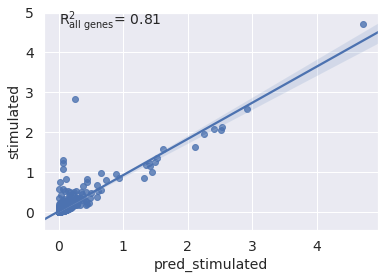

In [45]:
surgeon.pl.reg_mean_plot(adata_pred,
                         top_100_genes=None,
                         gene_list=None,
                         condition_key="condition",
                         axis_keys={'x': "pred_stimulated", 'y': "stimulated"},
                         labels={'x': "pred_stimulated", 'y': "stimulated"},
                         path_to_save=None,
                         legend=False,
                         show=True,
                         x_coeff=1.0,
                         y_coeff=0.0)

reg_var_all: 0.5236549556557053


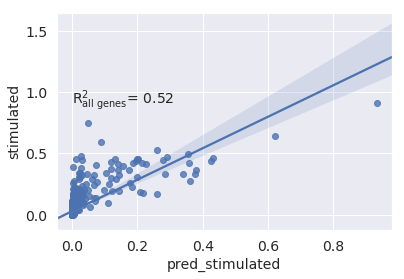

In [46]:
surgeon.pl.reg_var_plot(adata_pred,
                         top_100_genes=None,
                         gene_list=None,
                         condition_key="condition",
                         axis_keys={'x': "pred_stimulated", 'y': "stimulated"},
                         labels={'x': "pred_stimulated", 'y': "stimulated"},
                         path_to_save=None,
                         legend=False,
                         show=True,
                         x_coeff=1.0,
                         y_coeff=0.0)

In [3]:
adata = sc.read("./data/pbmc_perturb/pbmc_perturb_normalized.h5ad")
adata

AnnData object with n_obs × n_vars = 21742 × 1966 
    obs: 'batch', 'cell_type', 'condition', 'integrated_snn_res.0.5', 'nCount_RNA', 'nFeature_RNA', 'n_counts', 'orig.ident', 'seurat_annotations', 'seurat_clusters', 'size_factors', 'stim', 'study'
    var: 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0'